In [3]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-10-08 05:47:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.87MB/s    in 54s     

2020-10-08 05:48:35 (5.73 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



#NAMA : Reza Rismawandi
#HAL  : Submission Dicoding

In [4]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [56]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale = 1./255,
                featurewise_center=True,
                featurewise_std_normalization=True,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                validation_split=0.4)

In [57]:
train_generator = train_datagen.flow_from_directory(
                  base_dir,
                  color_mode='grayscale',
                  target_size = (150,150),
                  subset='training')

validation_generator = train_datagen.flow_from_directory(
                  base_dir,
                  color_mode='grayscale',
                  target_size = (150,150),
                  subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [38]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [73]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3,3), activation='relu', padding='same', input_shape=(150,150,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 41472)            

In [71]:
import tensorflow as tf
def scheduler(epoch, lr):
  if epoch < 25:
     return lr
  else:
     return lr * tf.math.exp(-0.1)
  
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [74]:
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_generator,
    steps_per_epoch = 15,      
    epochs = 50,
    validation_data = validation_generator,
     validation_steps = 3,
     callbacks=[callback]
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
15/15 [==============================] - 23s 2s/step - loss: 1.1238 - accuracy: 0.3313 - val_loss: 1.0989 - val_accuracy: 0.3229
Epoch 2/50
15/15 [==============================] - 22s 1s/step - loss: 1.0977 - accuracy: 0.3689 - val_loss: 1.1234 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 21s 1s/step - loss: 1.1045 - accuracy: 0.3267 - val_loss: 1.0944 - val_accuracy: 0.3646
Epoch 4/50
15/15 [==============================] - 22s 1s/step - loss: 1.1004 - accuracy: 0.3333 - val_loss: 1.0936 - val_accuracy: 0.3646
Epoch 5/50
15/15 [==============================] - 23s 2s/step - loss: 1.0918 - accuracy: 0.4521 - val_loss: 1.0839 - val_accuracy: 0.4896
Epoch 6/50
15/15 [==============================] - 23s 2s/step - loss: 1.0285 - accuracy: 0.4854 - val_loss: 0.9461 - val_accuracy: 0.5208
Epoch 7/50
15/15 [==============================] - 23s 2s/step - loss: 0.8465 - accuracy: 0.6042 - val_loss: 0.7964 - val_accuracy: 0.6562
Epoch 8/50
15/15 [==

Saving batu (12).png to batu (12).png


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(150, 150, 1)
[[0. 1. 0.]]
Rock


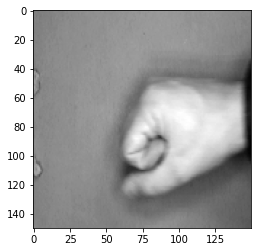

In [84]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150), grayscale=True);
  imgplot = plt.imshow(img, "gray")
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(classes)
  paper = "[1. 0. 0.]"
  rock = "[0. 1. 0.]"
  scissors = "[0. 0. 1.]"
  
  if str(classes[0]) == paper:
   print('Paper')
  elif str(classes[0]) == rock:
   print('Rock')
  else:
   print('Scissors')